# E Commerce Customer Churn Prediction1

__Description of Variables__ 

__CustomerID__: Unique customer ID

__Churn__ 	Churn Flag

__Tenure__	Tenure of customer in organization

__PreferredLoginDevice__	Preferred login device of customer

__CityTier__	City tier

__WarehouseToHome__	Distance in between warehouse to home of customer

__PreferredPaymentMode__	Preferred payment method of customer

__Gender__	Gender of customer

__HourSpendOnApp__	Number of hours spend on mobile application or website

__NumberOfDeviceRegistered__	Total number of deceives is registered on particular customer

__PreferedOrderCat__	Preferred order category of customer in last month

__SatisfactionScore__	Satisfactory score of customer on service

__MaritalStatus__	Marital status of customer

__NumberOfAddress__	Total number of added added on particular customer

__Complain__	Any complaint has been raised in last month

__OrderAmountHikeFromlastYear__	Percentage increases in order from last year

__CouponUsed__	Total number of coupon has been used in last month

__OrderCount__	Total number of orders has been places in last month

__DaySinceLastOrder__	Day Since last order by customer

__CashbackAmount__	Average cashback in last month

In [6]:
import numpy as np

## 1. Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1.1 Import the data

In [2]:
import pandas as pd

# Creating a class to read any type of file using pandas
class DataLoader:

    # constructor class
    def __init__(self,path,sht_name=0):
        self.path=path
        self.sheet = sht_name

    # function to handle csv files
    def csv_file(self):
        try:
            data = pd.read_csv(self.path)
            return data
        except Exception as e:
            raise ValueError(f"While reading the csv file we are getting Error as : {e}")

    # function to handle Excel files
    def excel_file(self):
        try:
            data = pd.read_excel(self.path,sheet_name=self.sheet)
            print(f"Data is from the sheet {self.sheet}, if you want other sheet data pass the sheet number along with the file-path!")
            return data
        except Exception as x:
            raise ValueError(f"While Reading the file there was an error: {x}")
            

    # function to handle html files
    def html_file(self):
        try:
            data  = pd.read_html(self.path)
            return data
        except Exception as p:
            raise ValueError(f"While reading the html file getting Error as: {p}")


    # funtion to handle json files
    def json_file(self):
        try:
            data = pd.read_json(self.path)
            return data
        except Exception as c:
            raise ValueError(f"While reading the Json getting error as: {c}")
            

    # funtion the to any type of files
    def read_data(self):
        try:
            if self.path.endswith(".csv") or self.path.endswith(".txt"):
                data_frame = self.csv_file()
                return data_frame
            elif self.path.endswith(".html"):
                data_frame = self.read_html(self.path)
                return data_frame
            elif self.path.endswith(".xlsx"):
                data_frame = self.excel_file()
                return data_frame
            elif self.path.endswith(".json"):
                dataframe = self.json_file()
                return data_frame
            else:
                raise ValueError("The File is not in .csv,.html,.json,.xlsx Extensions")
        except Exception as e:
            print(f"Error readin the file: {e}")
                

In [3]:
# reading the data using user-defined class
# initialize the class variable
dl = DataLoader("E Commerce Dataset.xlsx",1)

# read the data using class function
ecommerece_data = dl.read_data()

Data is from the sheet 1, if you want other sheet data pass the sheet number along with the file-path!


### 1.2 Read the Data

In [4]:
# read the imported data
ecommerece_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# shape of the dataset
ecommerece_data.shape

(5630, 20)

In [6]:
# column names in the dataset
ecommerece_data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
# types of variables in the data
ecommerece_data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### 1.3 Detect and Handling the Noisy Data

In [8]:
# check for the noisy data in the object type columns
for i in ecommerece_data.columns:
    print(i)
    print(ecommerece_data[i].unique())
    print("-------------------------------------------")
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]
-------------------------------------------

Churn
[1 0]
-------------------------------------------

Tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
-------------------------------------------

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']
-------------------------------------------

CityTier
[3 1 2]
-------------------------------------------

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
-------------------------------------------

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
-------------------------------------------

Gender
['Female' 'Male']
-------------------------------------------

HourSpendOnApp
[ 3.  2. n

__Observation__: There are some duplicate values in few variables.

        1. In PreferredLoginDevice, 'Mobile phone' and 'Phone'.
        
        2. In PreferredPaymentMode, 'Cash on Delivery'-'COD' adn 'CC'-'Credit Card'.
        
        3. In preferedOrderCat, 'Mobile' and 'Mobile phone'.

We can convert those duplicate values to sinlge category.

In [9]:
# convert duplicate entries to original entries
ecommerece_data['PreferredPaymentMode'] = ecommerece_data['PreferredPaymentMode'].replace({'COD':'Cash on Delivery','CC':'Credit Card'})
ecommerece_data['PreferredLoginDevice'] = ecommerece_data['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
ecommerece_data['PreferedOrderCat'] = ecommerece_data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [10]:
ecommerece_data.drop('CustomerID',axis=1,inplace=True)

### 1.4 Handling Null values

In [11]:
# CHeck for null values
ecommerece_data.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
# Creating a function to replace null values with median for Numerical variables and Mode for Categorical variables.

def Handling_null_values(data):
    if data.isna().sum() >0:
        if data.dtype == 'int' or data.dtype == 'float':
            filled_data = data.fillna(data.median())
            return filled_data
        elif data.dtype == 'object':
            filled_data = data.fillna(data.mode())
            return filled_data
        else:
            print("Data is neither Numerical nor Categorical!.")
    else:
        return data

In [13]:
# loop over
for i in ecommerece_data.columns:
    ecommerece_data[i] = Handling_null_values(ecommerece_data[i])

In [14]:
#data set info
ecommerece_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

## 2. Exploratory Data Analysis - EDA

### 2.1 statistical measures of Data

In [15]:
# Statistical values of data
ecommerece_data.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### 2.2 Univariate Analysis

In [16]:
# import libraries for the Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# funtion to visualize the numerical Variable types 
def univariate_plot_numerical(data):
    # make the subplots for hist and box
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    # visualize the histplot
    sns.histplot(data,ax=ax[0],kde=True)
    # visualize the box plot
    sns.boxplot(x=data,ax=ax[1])
    # set the titles for every subplot
    ax[0].set_title("Hist plot")
    ax[1].set_title("Box Plot")

In [18]:
# function to visualize the Object type variables
def univariate_plot_object(data):
    # make the subplots for count and pie chart
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    # visualize the count plot
    sns.countplot(data,ax=ax[0])
    # visualize the pie chart
    data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,)
    # set the titles for the every subplot
    ax[0].set_title("Count plot")
    ax[1].set_title("Pie Chart")

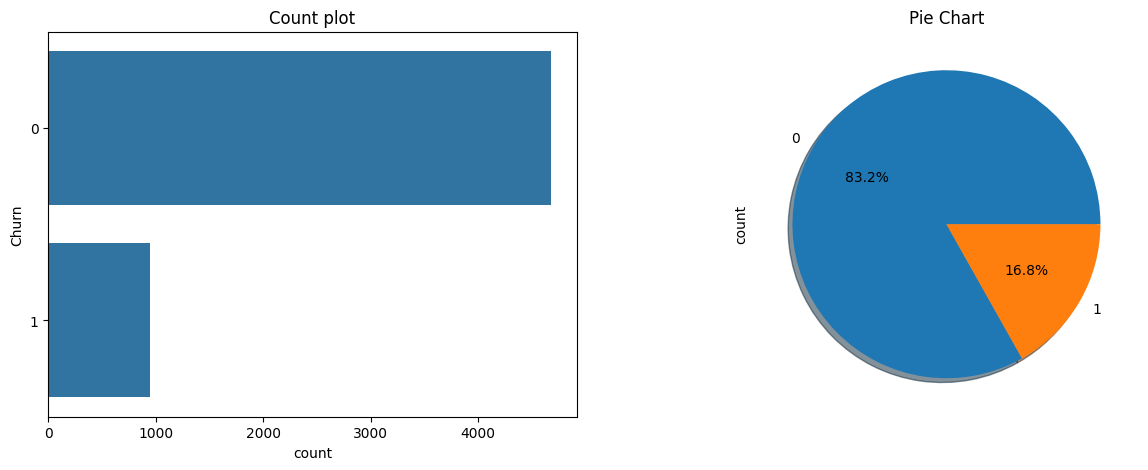

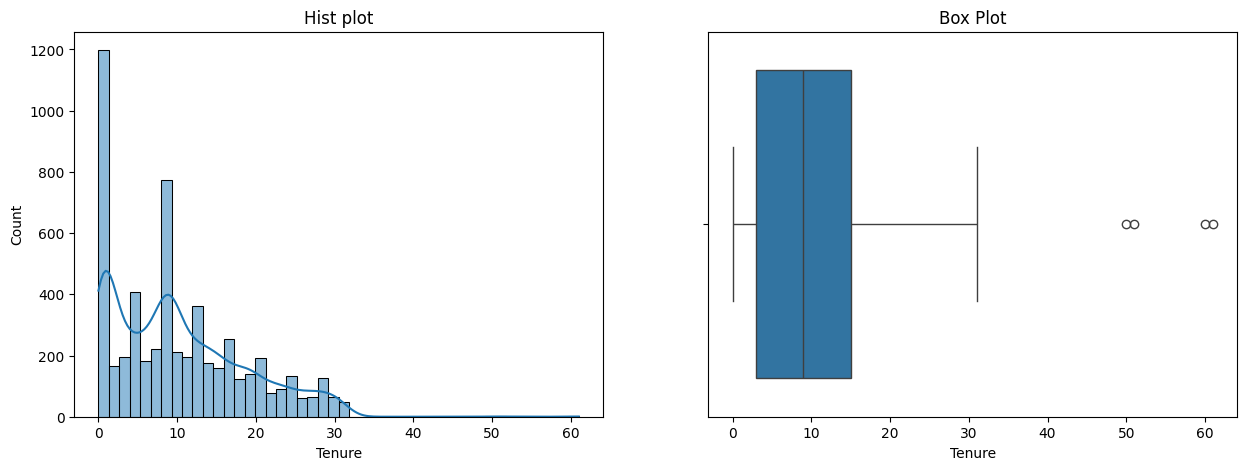

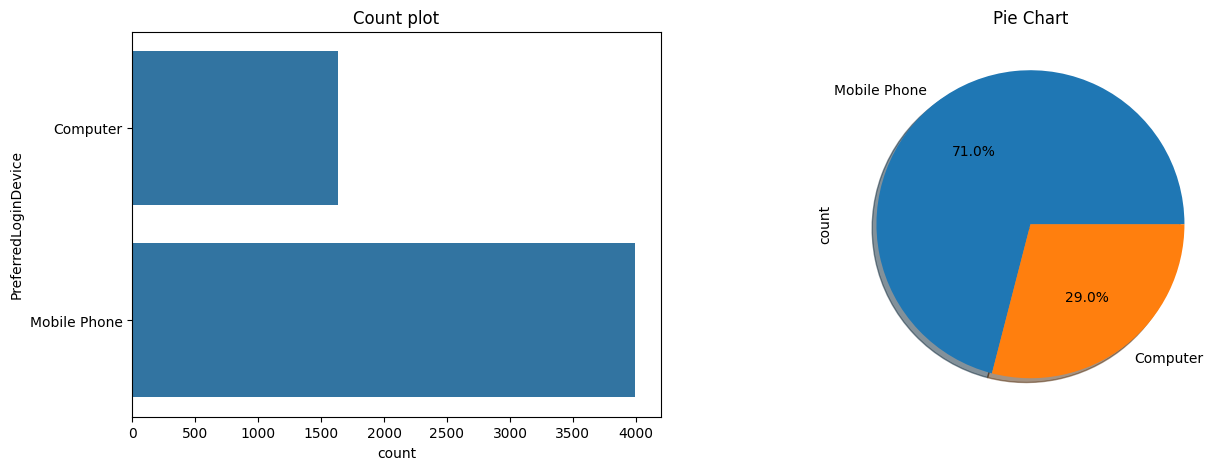

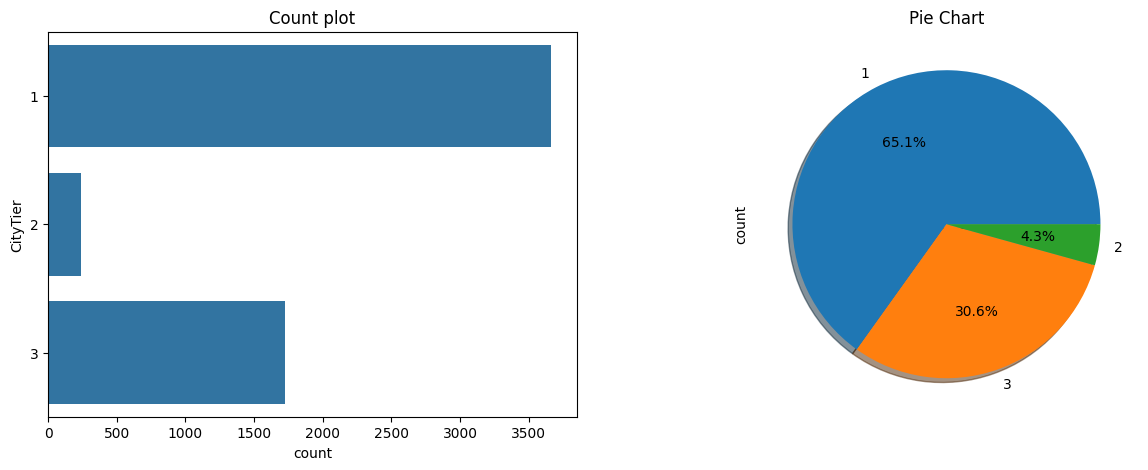

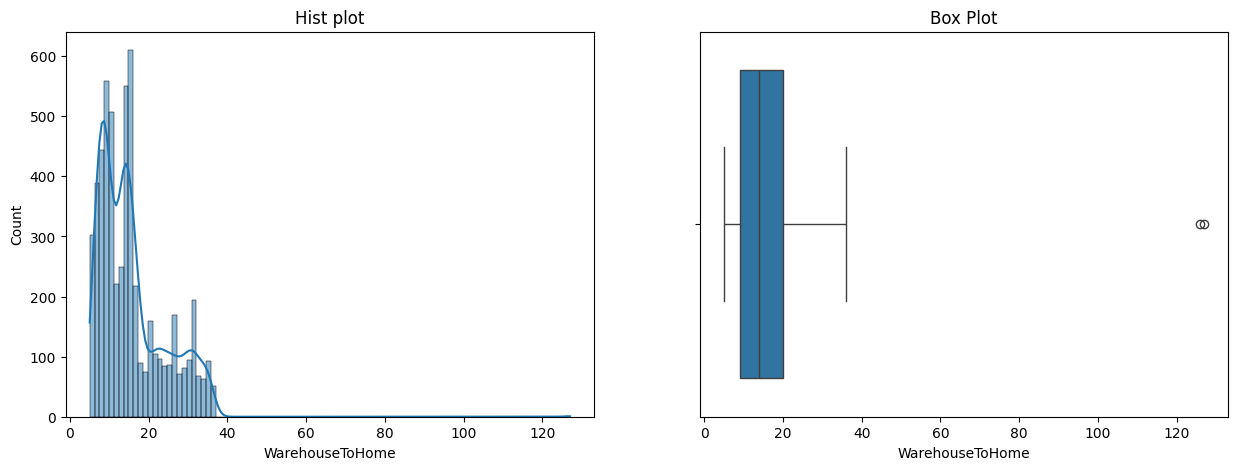

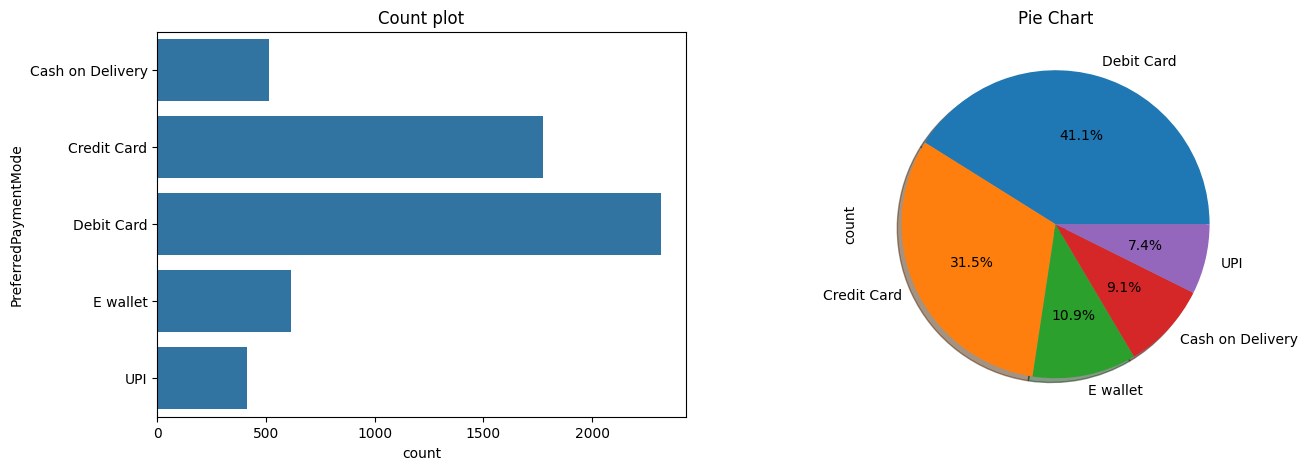

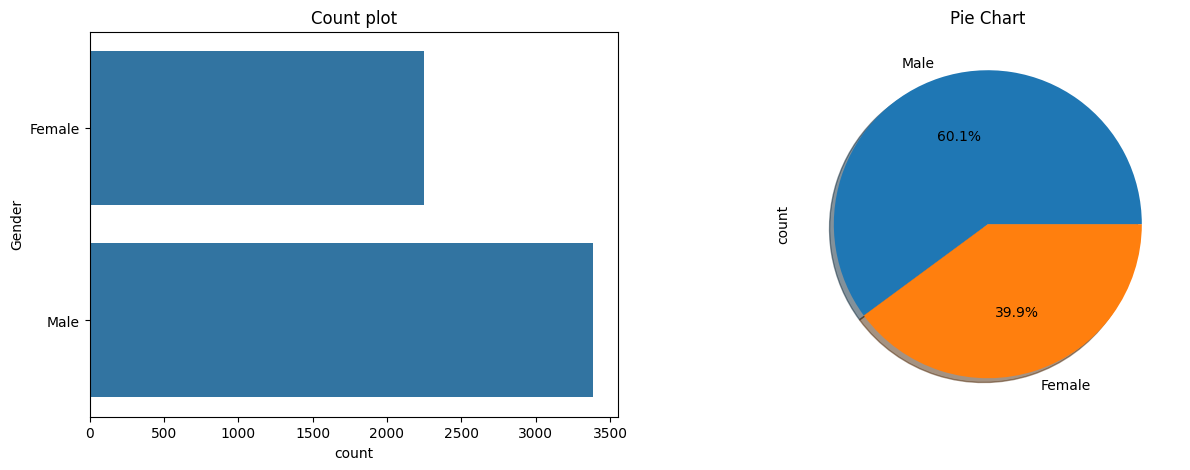

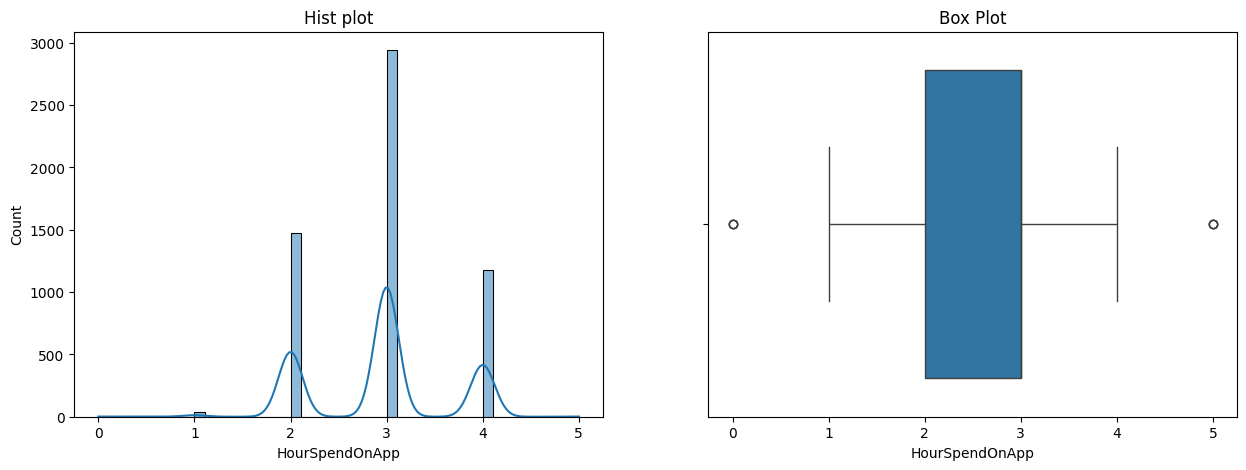

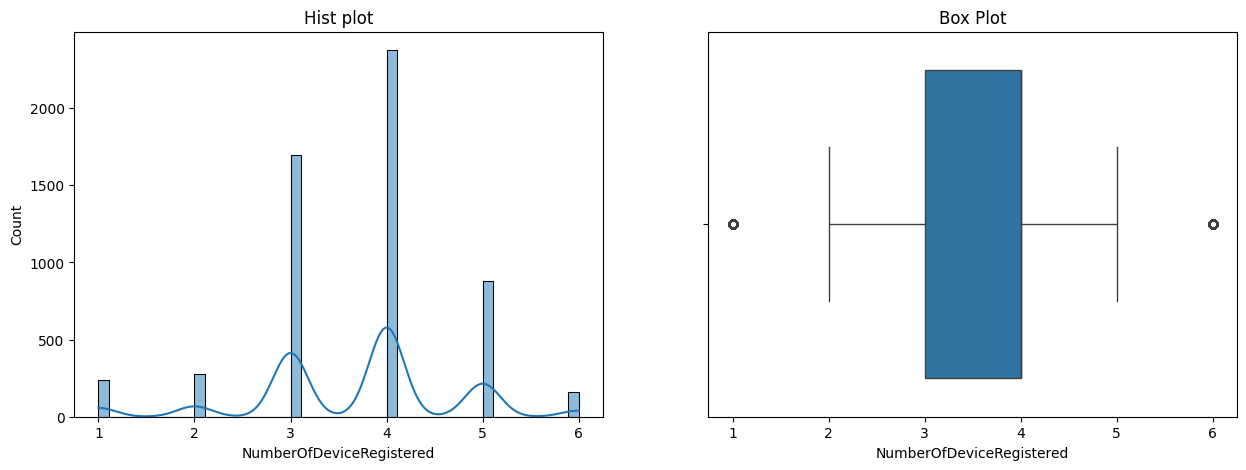

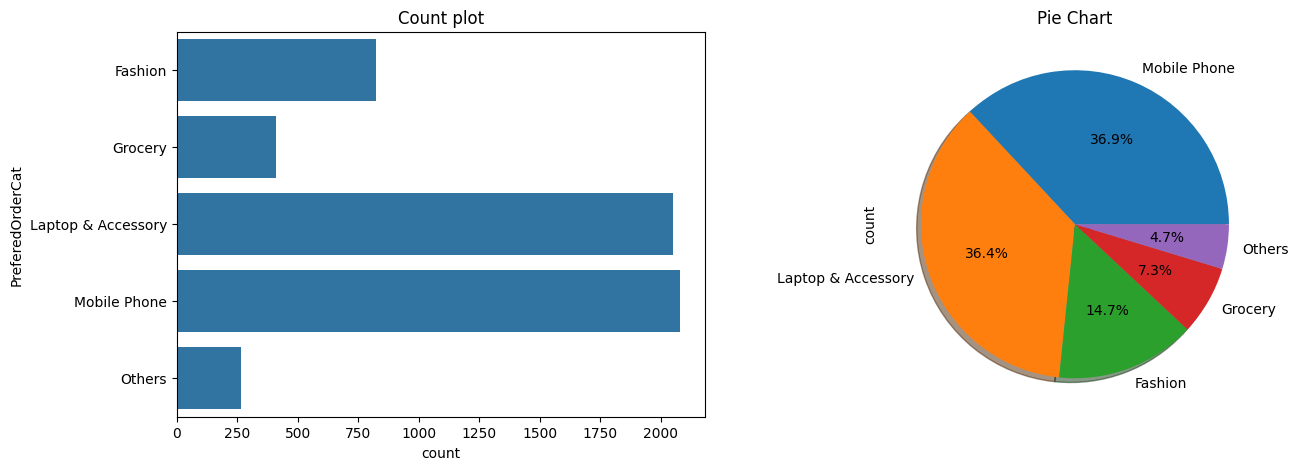

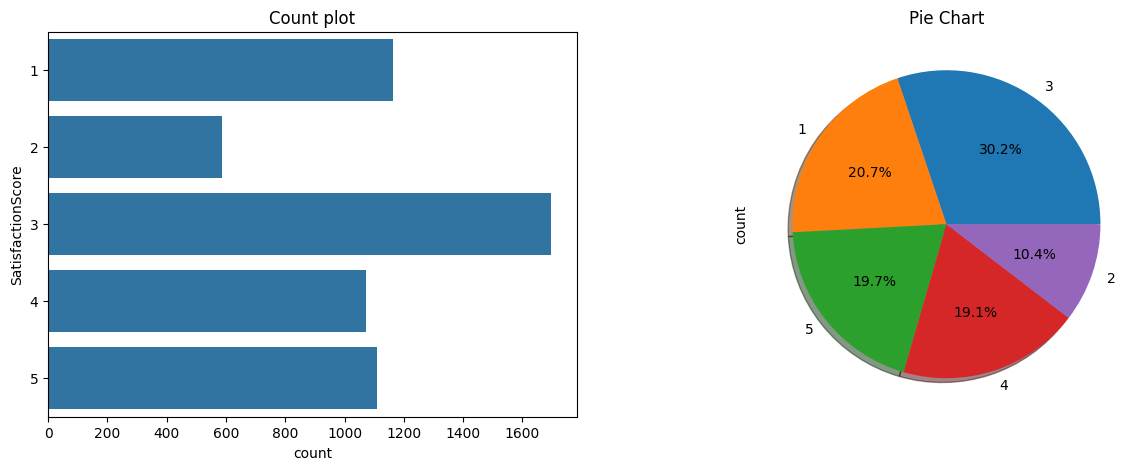

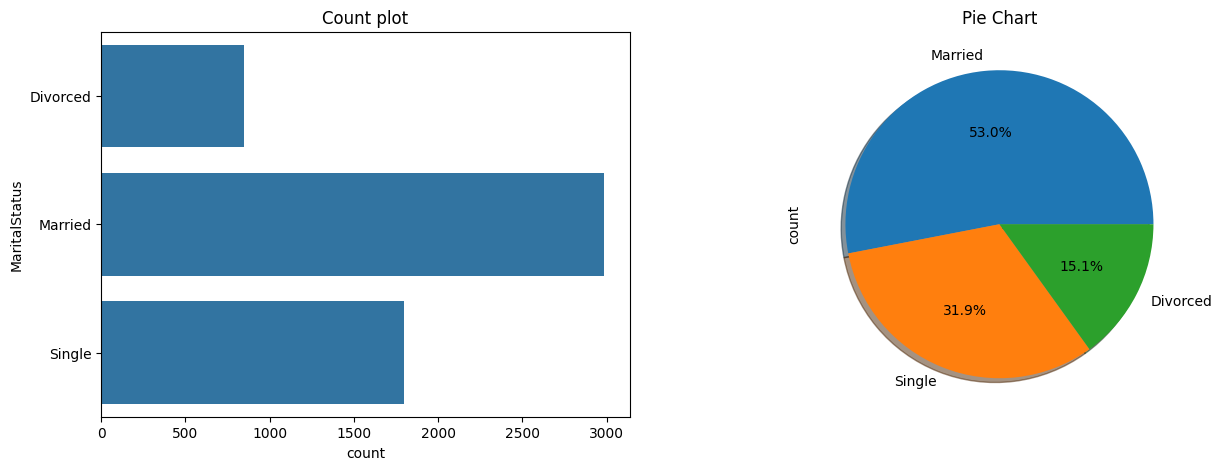

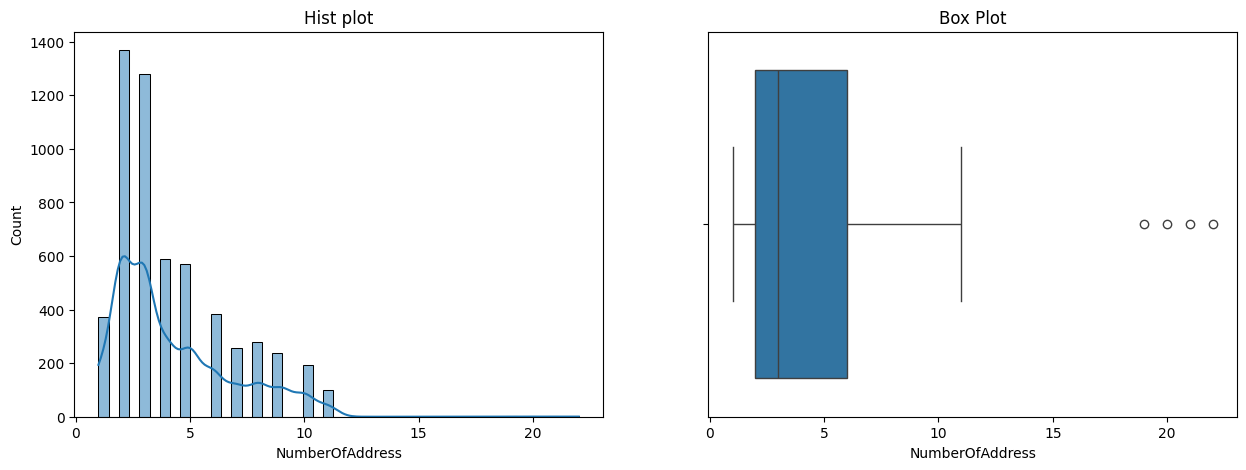

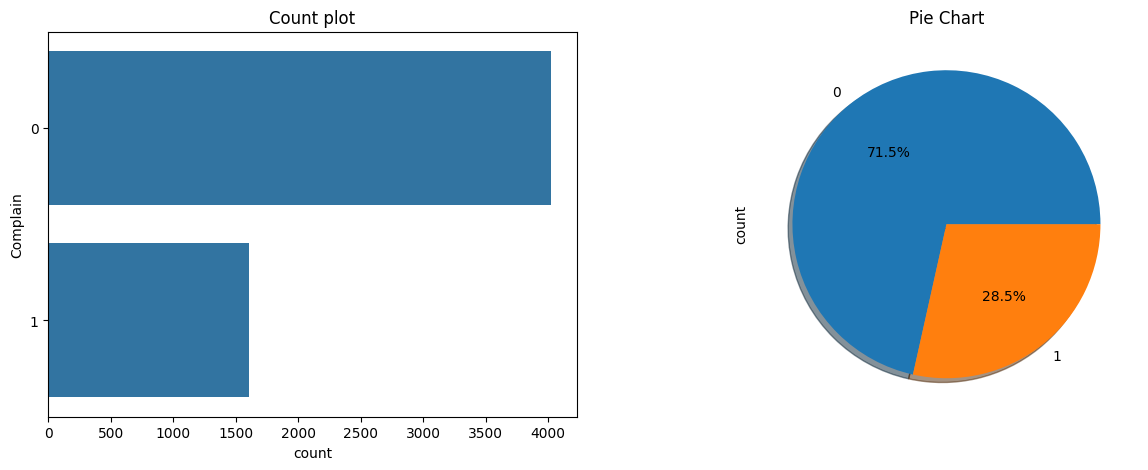

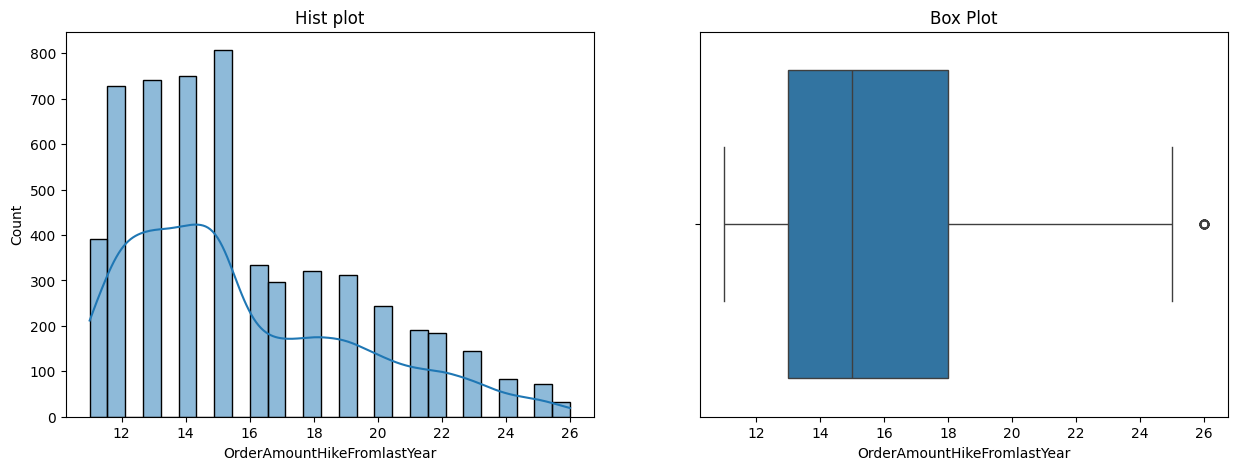

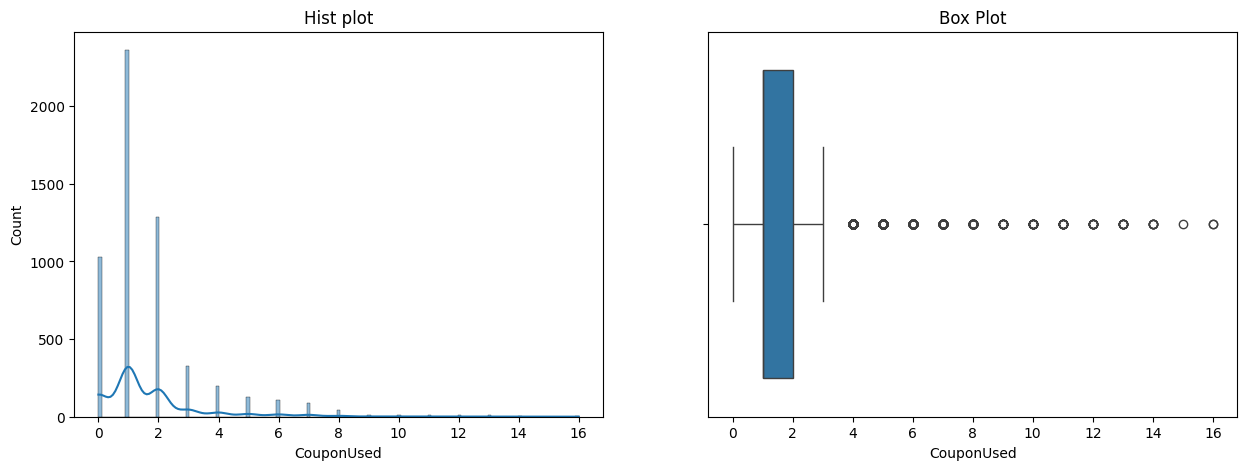

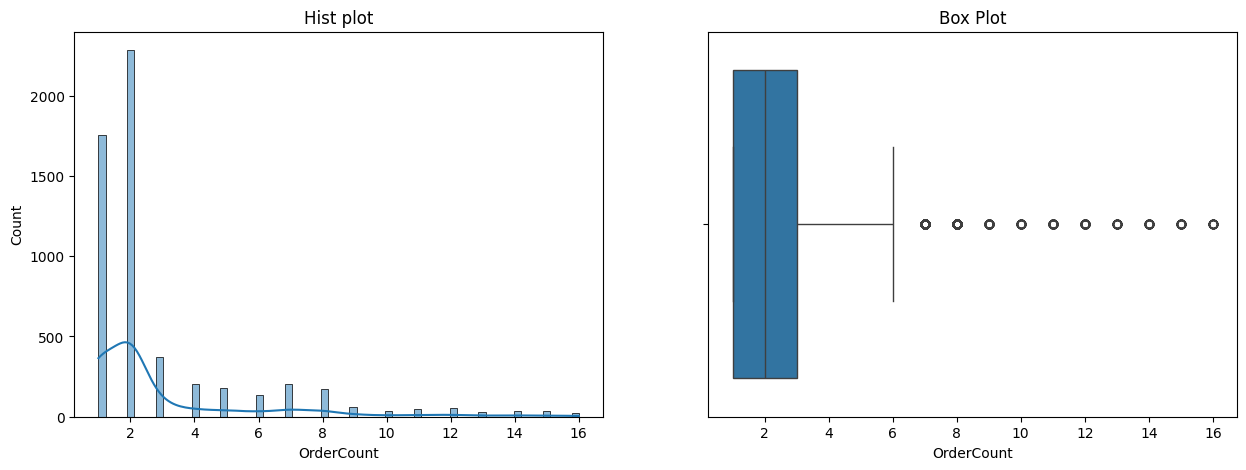

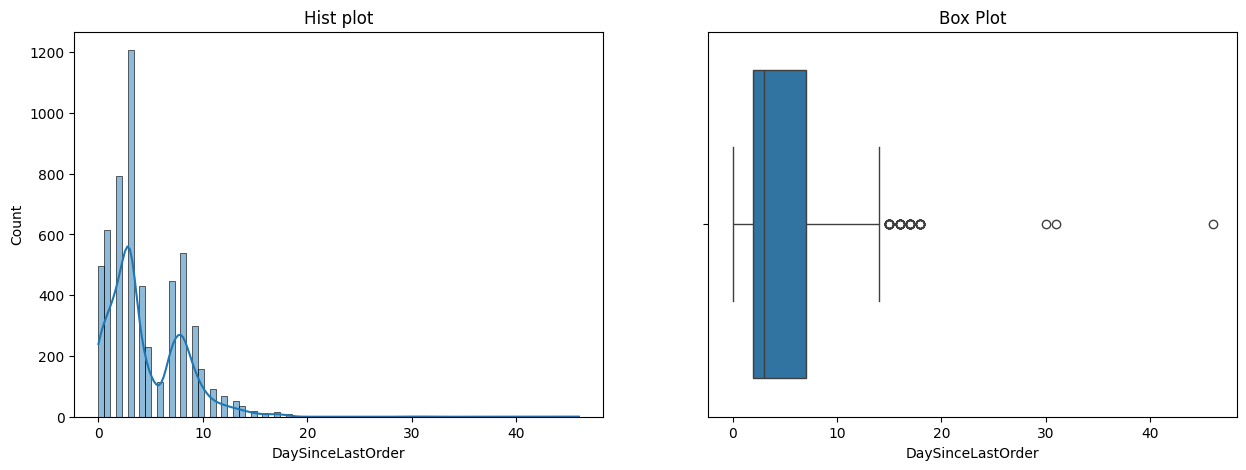

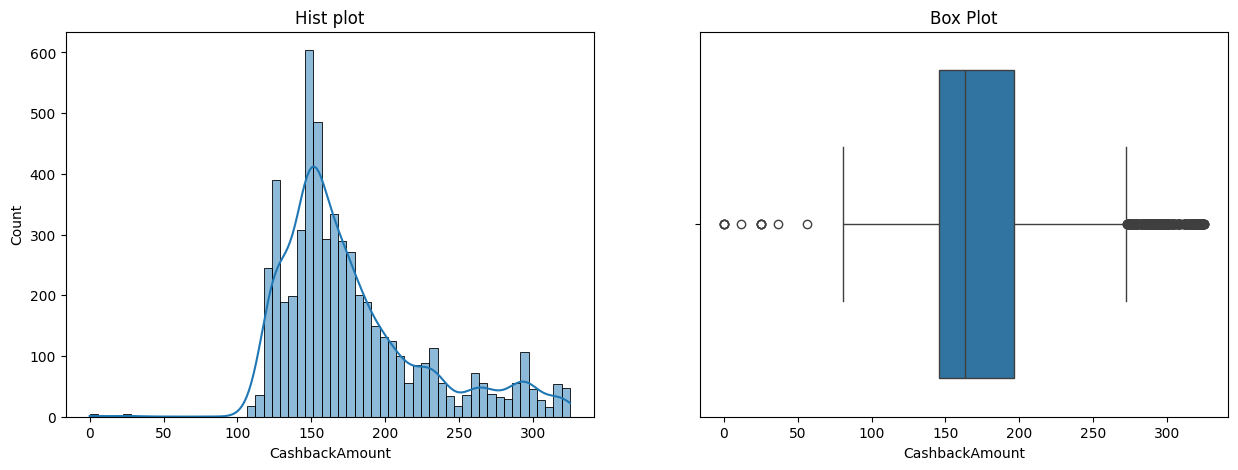

In [19]:
# loop over the all the variables in the data
for i in ecommerece_data.columns:
    # check if the unique values are >5 or not confirm whether it is Nominal data or ordinal data
    if len(ecommerece_data[i].unique()) > 5 and ecommerece_data[i].dtype != 'object':
        # numerical plot function for ordinal data
        univariate_plot_numerical(ecommerece_data[i])
    else:
        # object plot function for nominal data
        univariate_plot_object(ecommerece_data[i].astype('category'))

### 2.3 Bivariate Analysis

In [20]:
def numerical_with_target_box_plot(data,target):
    fig,ax = plt.subplots(1,1,figsize=(7,4))
    sns.boxplot(x=target,y=data,palette='bright')

In [21]:
def object_with_target_countplot(data,target):
    fig,ax = plt.subplots(1,1,figsize=(7,4))
    sns.countplot(x=data,hue=target)

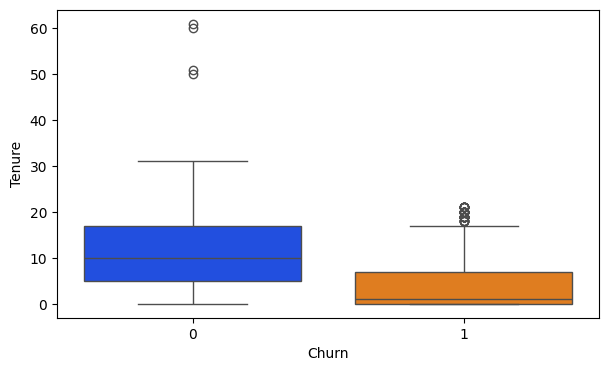

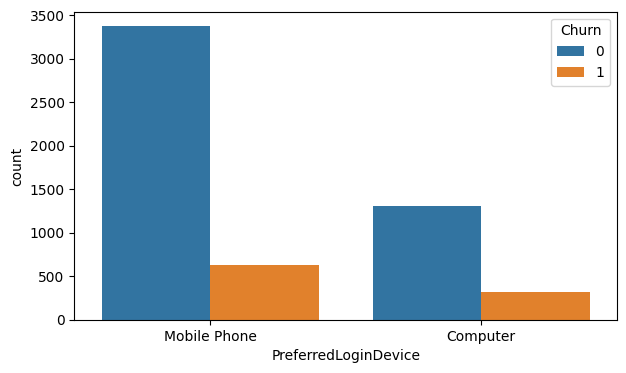

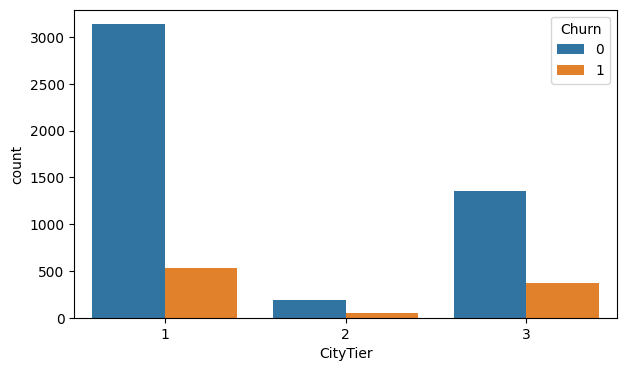

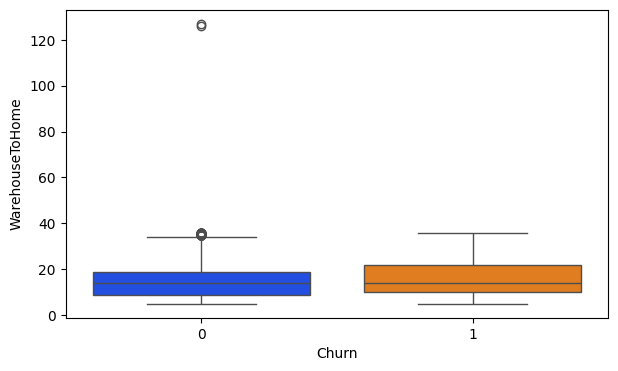

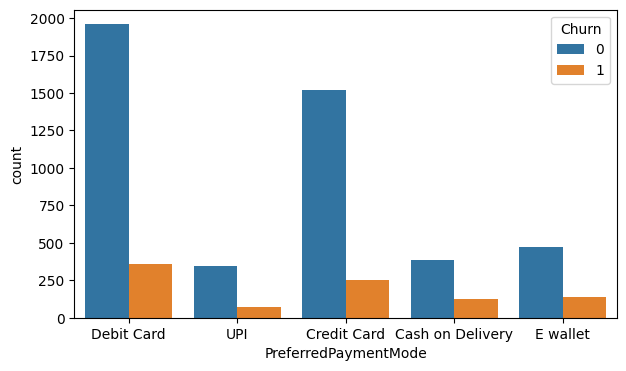

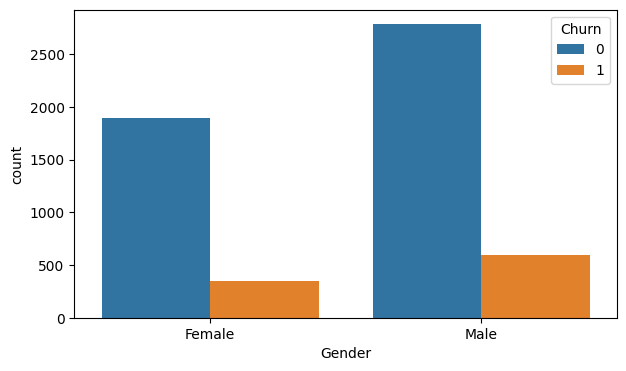

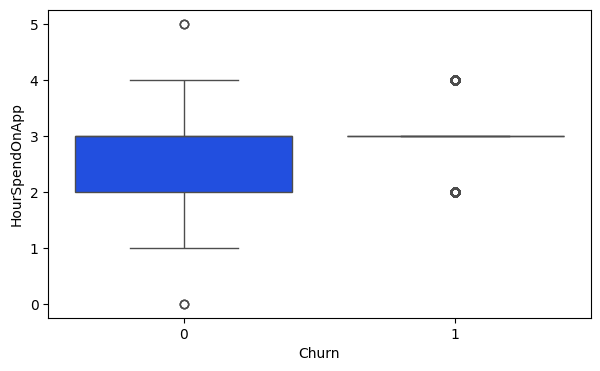

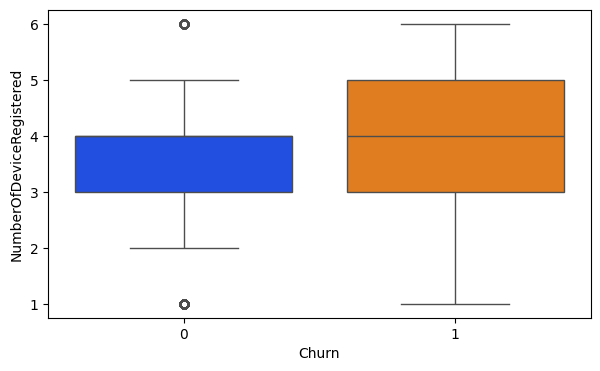

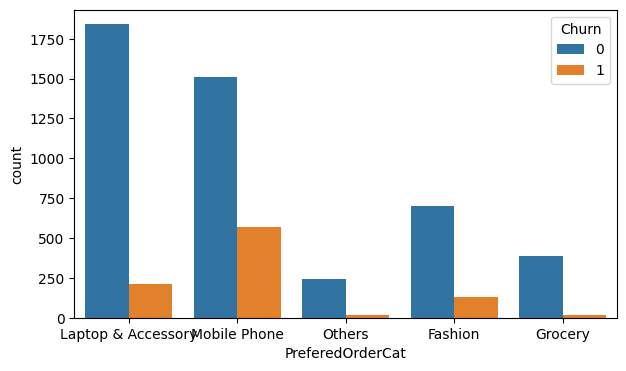

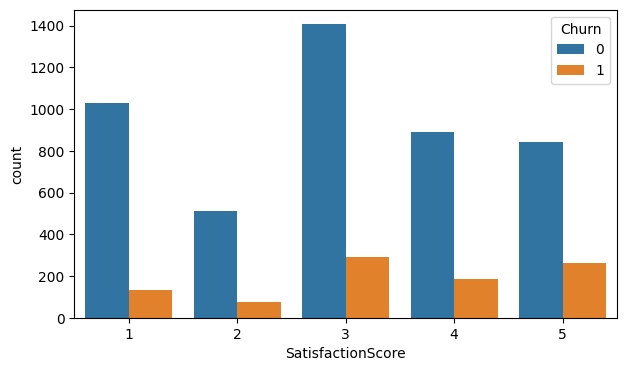

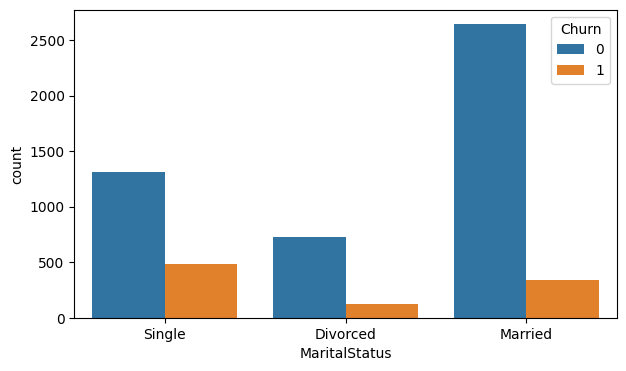

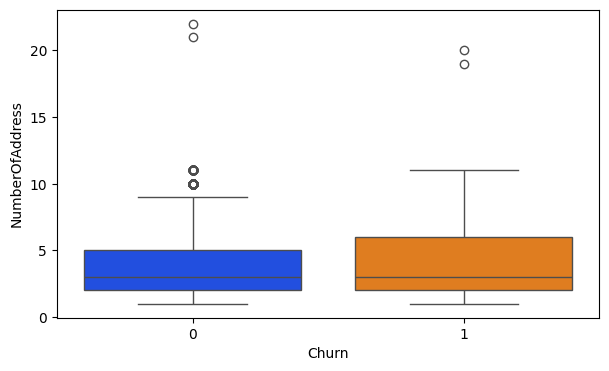

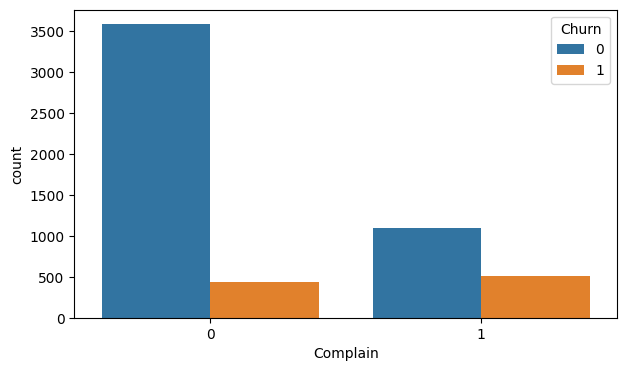

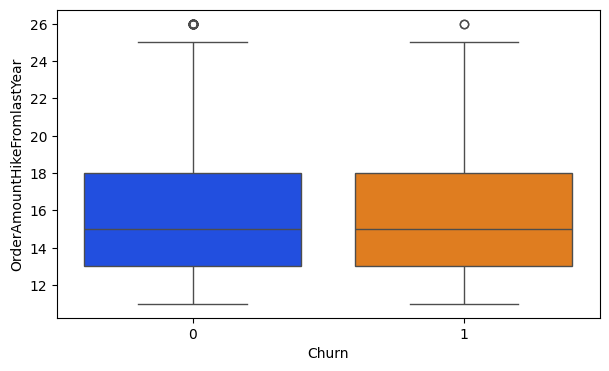

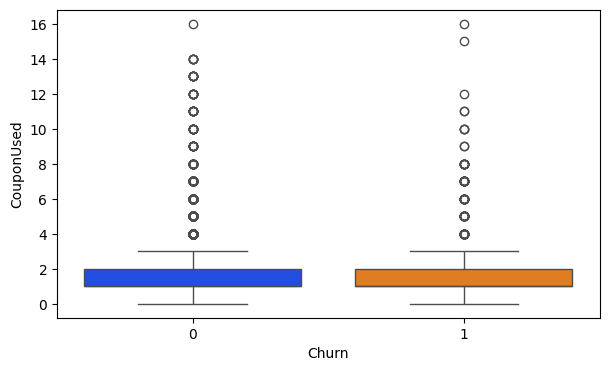

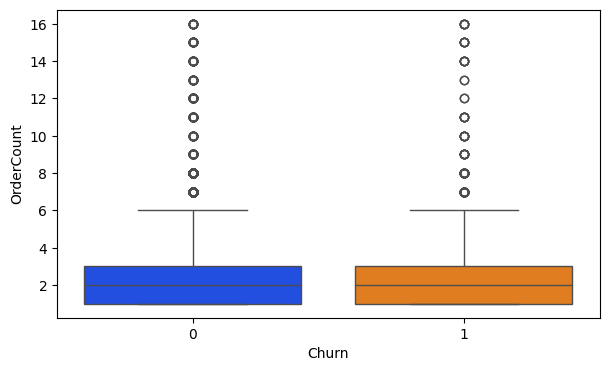

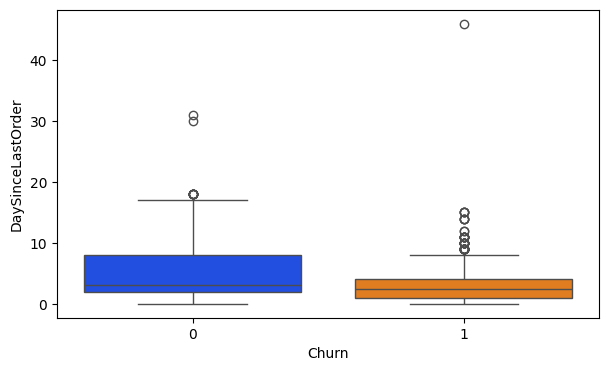

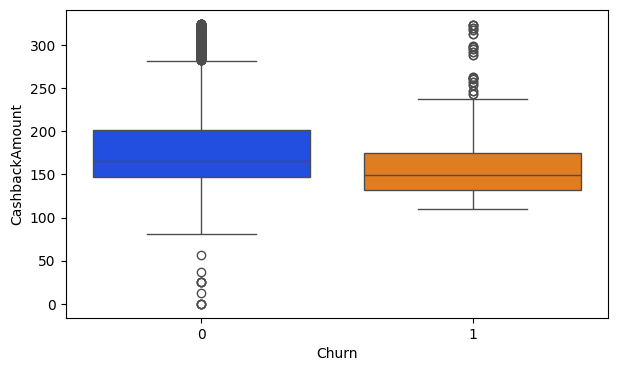

In [22]:
for i in ecommerece_data.columns.drop('Churn'):
    if len(ecommerece_data[i].unique()) > 5 and ecommerece_data[i].dtype != 'object':
        numerical_with_target_box_plot(ecommerece_data[i],ecommerece_data['Churn'])
    else:
        object_with_target_countplot(ecommerece_data[i],ecommerece_data['Churn'])

__Observation__ :

1. In the above plots, we can see that data the target variable have 83% of data with non Churn Customers and 17% of data with churned customers. F1 score, recall, precision will be the best to measure performance of the model.
2. Some of the columns are Discrete type values we can convert them to segment wise Base on the Bivariate plots to avoid impurity in the models.
3. Most of the customers are in between 0-10 years Tenure and above 21 years customers are non churned customers.
4. 71% of the Customers are using Mobile phones and 29% are using computers to make the orders.
5. Maximum no of the Customers are from Tier-1 City and minimum no of customers are form tier-2 city.
6. Warehouses are within the range 10 km Averagely for customers who are non churned and for churned customers it was 20 km.
7. most of the Customers are using Debit and credit cards for billing. customers are spending Averagely2-4 hrs on the website.

### 2.4 Multivariate Analysis

<Axes: >

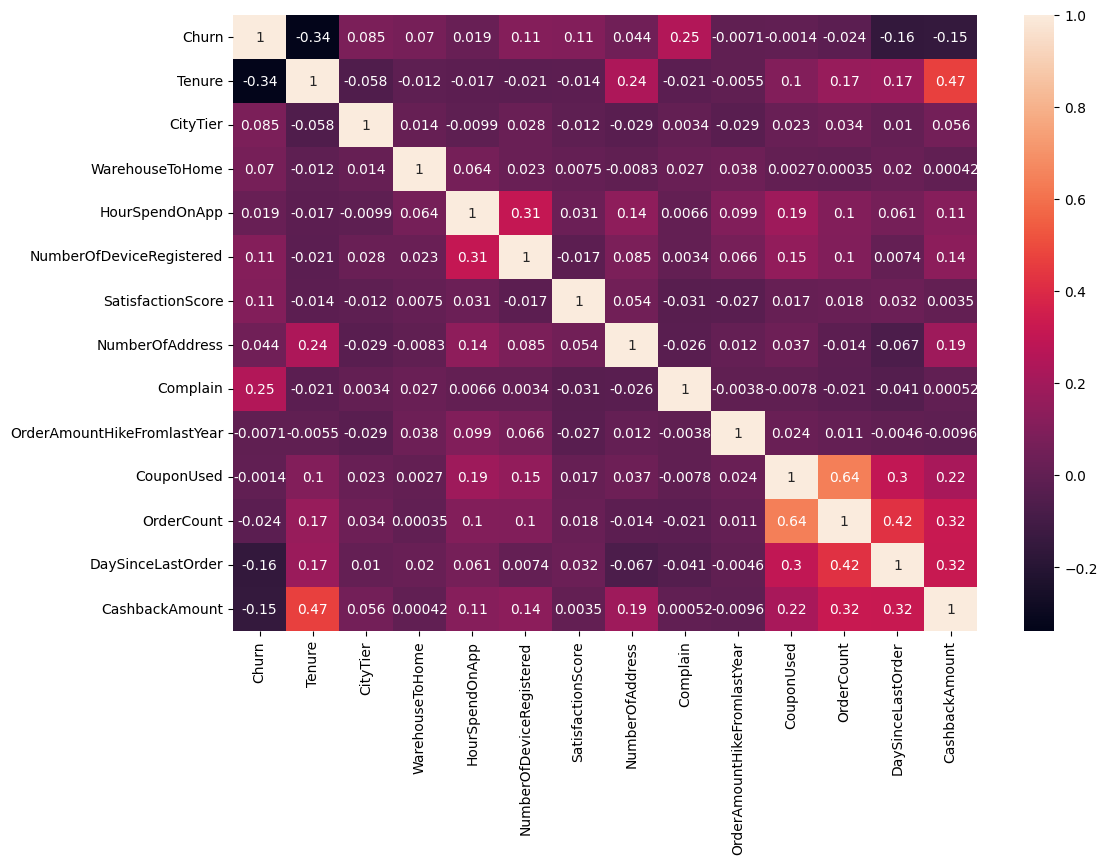

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(ecommerece_data.corr(numeric_only=True),annot=True)

## 3. Handling Outliers

In [24]:
import numpy as np
# defining the function to handle the outliers
def handling_Outliers(data):
    # 25 percentile of the data
    q1 = np.percentile(data,25)
    # 75 percentile of the data
    q3 = np.percentile(data,75)
    # Inter quatile range
    iqr = q3-q1
    # upper boundary 
    upper_boundary = q3+1.5*iqr
    # lower boundary
    lower_boundary = q1-1.5*iqr
    return upper_boundary,lower_boundary

In [25]:
# Storing the upper and lower boundaries
ub,lb = handling_Outliers(ecommerece_data['CashbackAmount'])

In [26]:
# replacing the values with nan which have greater the uper boudary value
ecommerece_data.loc[ecommerece_data['CashbackAmount']>ub,'CashbackAmount'] = np.nan

In [27]:
# replacing the values with nan whihc have less than the lower boundary
ecommerece_data.loc[ecommerece_data['CashbackAmount']<lb,'CashbackAmount'] = np.nan

In [28]:
# fill the null values with median of the data
ecommerece_data['CashbackAmount'] = Handling_null_values(ecommerece_data['CashbackAmount'])

## 4. Feature Engineering

In [29]:
# convert the discrete values to nominal
ecommerece_data['Tenure'] = ecommerece_data['Tenure'].apply(lambda x:'>21 years' if x>=21 else '16-20 years' if x>=11 else '0-10 years')
ecommerece_data['WarehouseToHome'] = ecommerece_data['WarehouseToHome'].apply(lambda x:'>40 km' if x>40 else '16-39 km' if x>16 else '<15 km')
ecommerece_data['NumberOfAddress'] = ecommerece_data['NumberOfAddress'].apply(lambda x: '>10' if x>10 else '6-10' if x>5 else '0-5')
ecommerece_data['OrderAmountHikeFromlastYear'] = ecommerece_data['OrderAmountHikeFromlastYear'].apply(lambda x: '> 20%' if x>20 else 'Between 16-20%' if x>15 else 'upto 15%')
ecommerece_data['DaySinceLastOrder'] = ecommerece_data['DaySinceLastOrder'].apply(lambda x:'>10 days' if x>10 else '6-10 days' if x>5 else '0-5 days')

In [30]:
# check for duplicates if any
ecommerece_data[ecommerece_data.duplicated()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1347,1,0-10 years,Mobile Phone,1,<15 km,UPI,Male,3.0,4,Mobile Phone,3,Single,6-10,1,upto 15%,0.0,1.0,0-5 days,120.90
1359,1,0-10 years,Mobile Phone,1,16-39 km,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6-10,1,upto 15%,0.0,1.0,0-5 days,120.28
1395,1,16-20 years,Mobile Phone,1,<15 km,Debit Card,Male,3.0,4,Fashion,3,Single,6-10,1,upto 15%,0.0,1.0,0-5 days,153.81
1456,1,0-10 years,Computer,1,<15 km,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,0-5,1,> 20%,1.0,1.0,6-10 days,160.74
1485,1,0-10 years,Mobile Phone,1,<15 km,Credit Card,Female,2.0,3,Mobile Phone,5,Single,6-10,0,> 20%,1.0,1.0,0-5 days,142.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,1,16-20 years,Computer,3,<15 km,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,6-10,0,upto 15%,2.0,2.0,0-5 days,192.28
5613,0,0-10 years,Mobile Phone,3,16-39 km,E wallet,Female,4.0,5,Laptop & Accessory,1,Married,6-10,0,upto 15%,2.0,2.0,0-5 days,191.52
5620,0,0-10 years,Mobile Phone,1,16-39 km,Credit Card,Female,4.0,5,Mobile Phone,5,Single,0-5,0,upto 15%,1.0,2.0,0-5 days,162.85
5625,0,0-10 years,Computer,1,16-39 km,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6-10,0,Between 16-20%,1.0,2.0,0-5 days,150.71


In [31]:
# drop the duplicate rows from the daat to avoid data leakage for model
ecommerece_data.drop_duplicates(inplace=True)

In [32]:
# convert object data itno numerical using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ecommerece_data.select_dtypes(include='object').columns:
    ecommerece_data[i] = le.fit_transform(ecommerece_data[i])

In [33]:
# separate independent and target variables
X = ecommerece_data.drop('Churn',axis=1)
y = ecommerece_data['Churn']

In [34]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

## 5. Model Training and Testing

In [35]:
# import library to print classification report
from sklearn.metrics import classification_report

### 5.1 Naive Bayes Classifier

In [36]:
# import library to use the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB

# initialize the classifier
naive_bayes_classifier = BernoulliNB()
# fit the model
naive_bayes_classifier.fit(X_train,y_train)

# store the predictions of the model
predictions_naive_bayes = naive_bayes_classifier.predict(X_test)

# print the scores of the model
print(f"Train Accuracy for Naive Bayes Classifier: {naive_bayes_classifier.score(X_train,y_train)}")
print(f"Test Accuracy for Naive Bayes Classifier: {naive_bayes_classifier.score(X_test,y_test)}")
print(f"Classification Report: \n {classification_report(predictions_naive_bayes,y_test)}")

Train Accuracy for Naive Bayes Classifier: 0.8430851063829787
Test Accuracy for Naive Bayes Classifier: 0.8293460925039873
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      1210
           1       0.12      0.59      0.20        44

    accuracy                           0.83      1254
   macro avg       0.55      0.71      0.55      1254
weighted avg       0.95      0.83      0.88      1254



<Axes: >

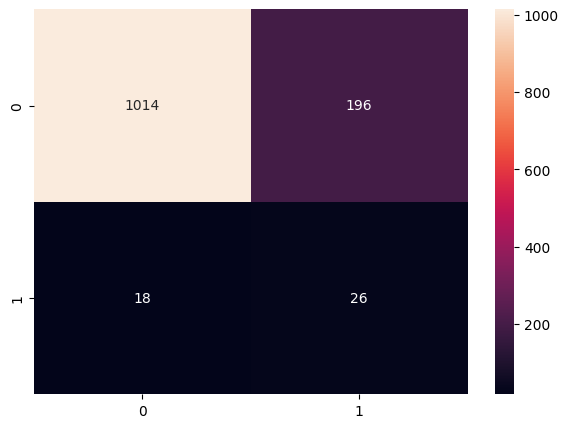

In [37]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(predictions_naive_bayes,y_test)
confusionMatrix_dataframe = pd.DataFrame(confusionMatrix)
fig,ax = plt.subplots(1,1,figsize = (7,5))
sns.heatmap(confusionMatrix_dataframe,annot=True,fmt='g')

### 5.2 Decision Tree Classifier

In [38]:
# import the library to use decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# initialize the model
decision_tree_classifier = DecisionTreeClassifier(random_state=27)
# fit the model
decision_tree_classifier.fit(X_train,y_train)
# make predictions with the model
predictions_decision_tree = decision_tree_classifier.predict(X_test)

# print the metrics of the model
print(f"Train Accuracy for Decision Tree CLassifier: {decision_tree_classifier.score(X_train,y_train)}")
print(f"Test Accuracy for Decision Tree Classifier: {decision_tree_classifier.score(X_test,y_test)}")
print(f"Classification Report:\n{classification_report(predictions_decision_tree,y_test)}")

Train Accuracy for Decision Tree CLassifier: 1.0
Test Accuracy for Decision Tree Classifier: 0.9059011164274322
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1034
           1       0.73      0.74      0.73       220

    accuracy                           0.91      1254
   macro avg       0.84      0.84      0.84      1254
weighted avg       0.91      0.91      0.91      1254



<Axes: >

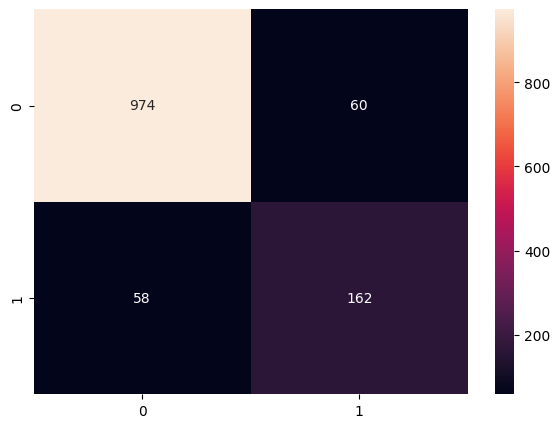

In [39]:
# visulize the confusion matrix of the model
confusionMatrix = confusion_matrix(predictions_decision_tree,y_test)
confusionMatrix_dataframe = pd.DataFrame(confusionMatrix)
fig,ax = plt.subplots(1,1,figsize = (7,5))
sns.heatmap(confusionMatrix_dataframe,annot=True,fmt='g')

### 5.3 Random Forest Classifier

In [40]:
# import library to use the Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# initialize the model
random_forest_classifier = RandomForestClassifier(random_state=27,n_estimators=50)
# fit the model
random_forest_classifier.fit(X_train,y_train)
# make predictions with the model
predictions_random_forest = random_forest_classifier.predict(X_test)

# print the performance metrics of the model
print(f"Train Accuracy for Random forest Classifier: {random_forest_classifier.score(X_train,y_train)}")
print(f"Test Accuracy for Random forest Classifier: {random_forest_classifier.score(X_test,y_test)}")
print(f"Classification Report:\n {classification_report(predictions_random_forest,y_test)}")

Train Accuracy for Random forest Classifier: 1.0
Test Accuracy for Random forest Classifier: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1075
           1       0.73      0.91      0.81       179

    accuracy                           0.94      1254
   macro avg       0.86      0.92      0.89      1254
weighted avg       0.95      0.94      0.94      1254



<Axes: >

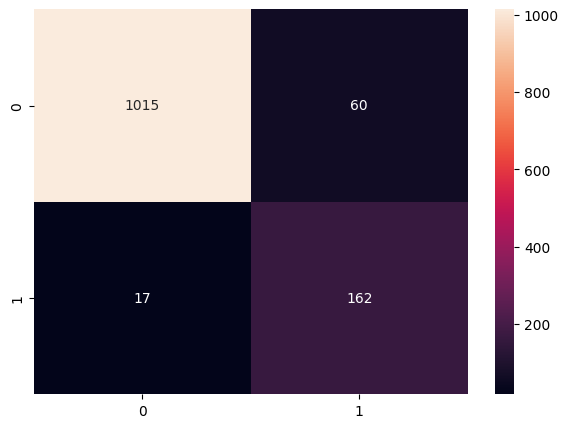

In [41]:
# visualize the confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(predictions_random_forest,y_test)
confusionMatrix_dataframe = pd.DataFrame(confusionMatrix)
fig,ax = plt.subplots(1,1,figsize = (7,5))
sns.heatmap(confusionMatrix_dataframe,annot=True,fmt='g')

## 6. Model Tuning and Cross Validation

### 6.1 Cross validation

In [42]:
# import library to use cross validation techniques
from sklearn.model_selection import StratifiedKFold,cross_val_score

# initialize the cv model
stratified_kfold_cv = StratifiedKFold(n_splits=10)
# runt he model
cross_validation_scores_dtree = cross_val_score(DecisionTreeClassifier(),X,y,cv = stratified_kfold_cv)
print(f"Accuracies on different splits: {cross_validation_scores_dtree}")
print(f"Mean the Accuracies: {cross_validation_scores_dtree.mean()}")

Accuracies on different splits: [0.94820717 0.95816733 0.94422311 0.9561753  0.97804391 0.95808383
 0.94011976 0.90618762 0.96407186 0.97005988]
Mean the Accuracies: 0.9523339774634


In [43]:
# run the Cv model with random forest classifier
stratified_kfold_cv = StratifiedKFold(n_splits=10)
cross_validation_scores_rf = cross_val_score(RandomForestClassifier(),X,y,cv = stratified_kfold_cv)
print(f"Accuracies on different splits: {cross_validation_scores_rf}")
print(f"Mean the Accuracies: {cross_validation_scores_rf.mean()}")

Accuracies on different splits: [0.97011952 0.9561753  0.94223108 0.96812749 0.96606786 0.97205589
 0.96806387 0.93013972 0.98203593 0.97804391]
Mean the Accuracies: 0.9633060572082925


### 6.2 Model Tuning

In [44]:
# import the library to use hypertune the models
from sklearn.model_selection import GridSearchCV

# define randomsearchcv hypertuning
def hyper_tuning(model,params):
    print('HyperTuning')
    # initialize the gridsearch cv
    grid_search_cv = GridSearchCV(model,params,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)
    # fit the cv
    grid_search_cv.fit(X_test,y_test)
    print('\nBest Parameters are:',grid_search_cv.best_params_)
    print('\nBest Score: %0.2f'%grid_search_cv.best_score_)

In [45]:
# initialize the params for decision tree
decisiontree_params = {'criterion': ['gini','entropy'], 
                'max_depth': [5,10,15], 
                'max_features': ["auto", "sqrt", "log2"], 
                'max_leaf_nodes': [10,30,50],
                'min_samples_leaf': [1,5,10], 
                'min_samples_split': [2,10,15],
                'random_state': [1,5,10,16,27,42], 
                'splitter':['best','random']}

decision_tree_clf1 = DecisionTreeClassifier()
# fit the params and model into the tuning function
hyper_tuning(decision_tree_clf1,decisiontree_params)

HyperTuning
Fitting 5 folds for each of 5832 candidates, totalling 29160 fits

Best Parameters are: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'random'}

Best Score: 0.85


In [46]:
# initialize the params for random forest
random_forest_params = {'bootstrap': [True, False],
                         'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100],
                         'criterion' : ['gini','entropy'],
                         'random_state' : [1,5,10,16,21,42]}

random_forest_clf1 = RandomForestClassifier()
# fit the params and model into the tuning function
hyper_tuning(random_forest_clf1,random_forest_params)

HyperTuning
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits

Best Parameters are: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 16}

Best Score: 0.87


__Conclusion__
1. For the Ecommerece data set we have used Ensemble techniques. because data is imbalanced so ENsemble technquies are robust to imbalanced datasets.
2. For decision tree Classifier i got the Accuracy of 100% in traning and 90% in testing which we can say model overfitting. to avoid it we can use Random forest classifier.
3. When i use randopm forest classifier i have got training accuracy of 100% in training 93% with test data. which was good score but still facinf model overfitting.
4.  we can see the other metrics like F1 score, precision and recall. because our data is imbalanced.
5.  with decision tree got f1 score of 84% and with Random forest got 90% whihc will good score.
6.  I have done some cross validation to know how much maximum score our models can achieve. For Decision Tree we got 95% adn random forest got 96%.
7.  In all the performance metrics Random forest got good results when compare to decision tree. So, Random forest classifier would be good pick. 